In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [2]:
data=pd.read_csv("Iris.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,setosa
112,6.8,3.0,5.5,2.1,virginica
136,6.3,3.4,5.6,2.4,virginica
45,4.8,3.0,1.4,0.3,setosa
107,7.3,2.9,6.3,1.8,virginica
140,6.7,3.1,5.6,2.4,virginica
49,5.0,3.3,1.4,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
143,6.8,3.2,5.9,2.3,virginica
29,4.7,3.2,1.6,0.2,setosa


In [4]:
data.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor
5,5.4,3.9,1.7,0.4,setosa
9,4.9,3.1,1.5,0.1,setosa
131,7.9,3.8,6.4,2.0,virginica
40,5.0,3.5,1.3,0.3,setosa
116,6.5,3.0,5.5,1.8,virginica
93,5.0,2.3,3.3,1.0,versicolor
14,5.8,4.0,1.2,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
115,6.4,3.2,5.3,2.3,virginica


In [5]:
data.shape


(150, 5)

In [6]:
# Dataset Columns
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Dataset Statistical Summary
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking Null Values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
#Checking columns count of "Species"
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
#DATA VISUALIZATION

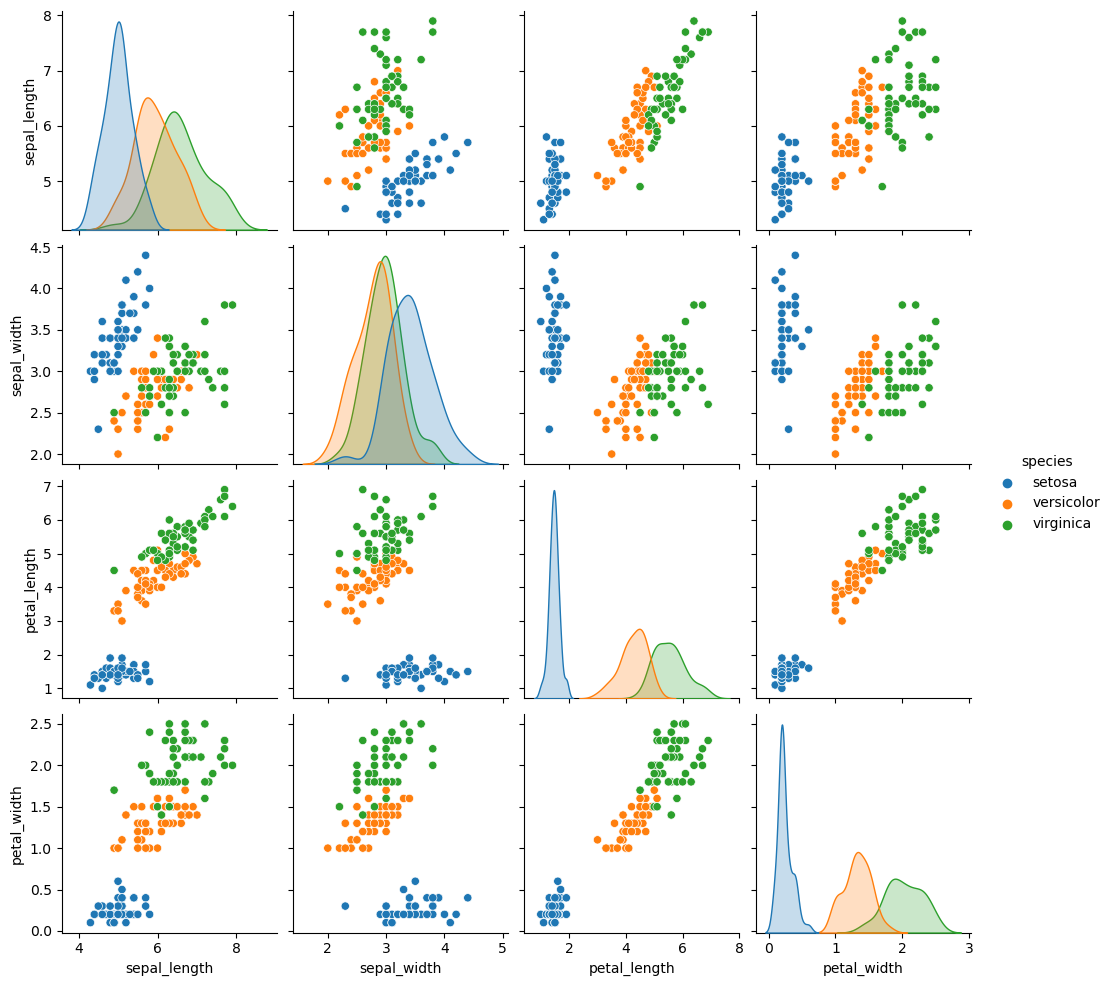

In [17]:
sns.pairplot(data,hue='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

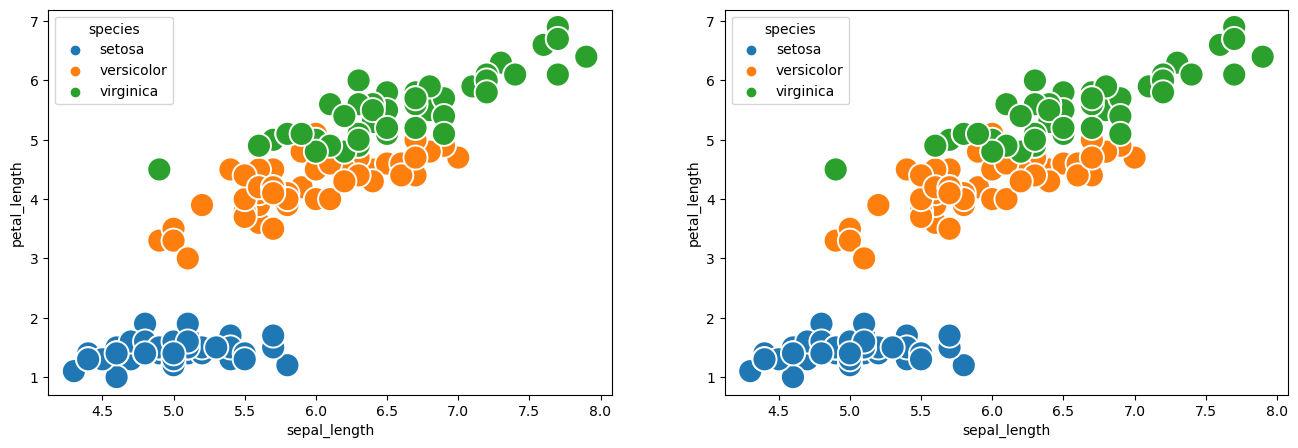

In [20]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length',y='petal_length',data=data,hue='species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='sepal_length',y='petal_length',data=data,hue='species',ax=ax2,s=300,marker='o')

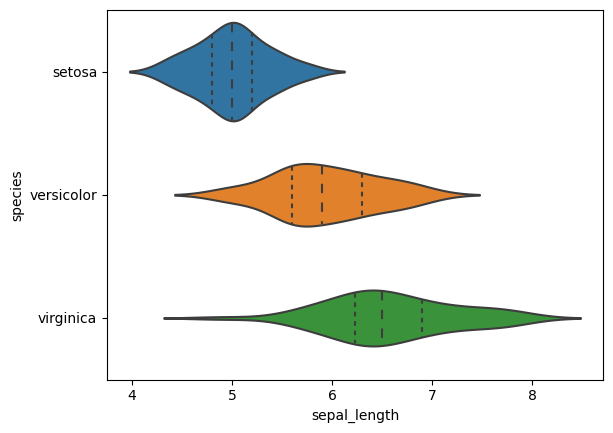

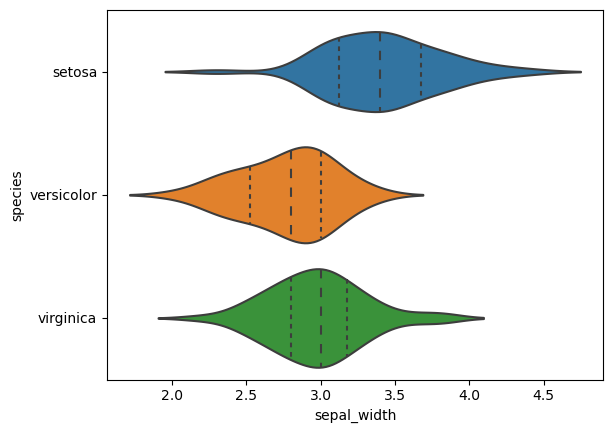

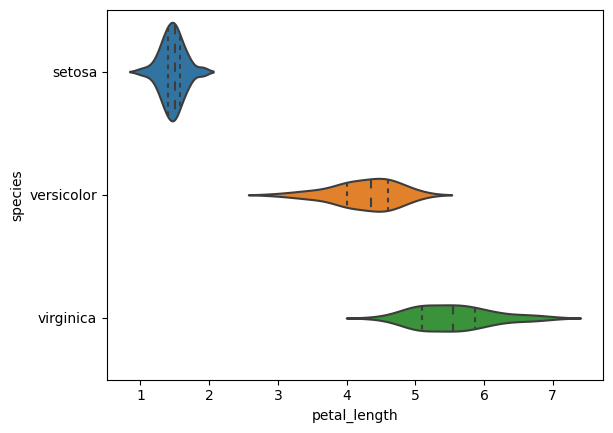

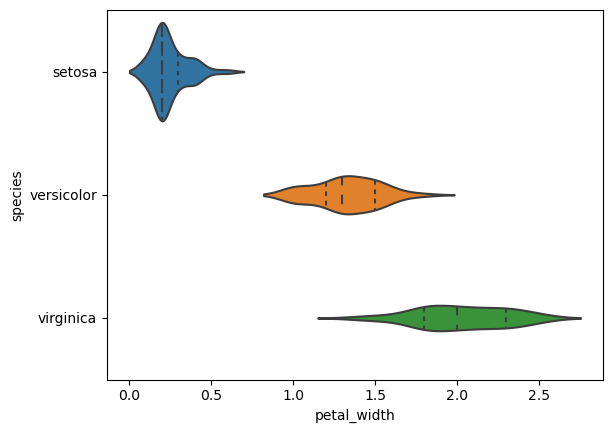

In [22]:
sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

<AxesSubplot:ylabel='species'>

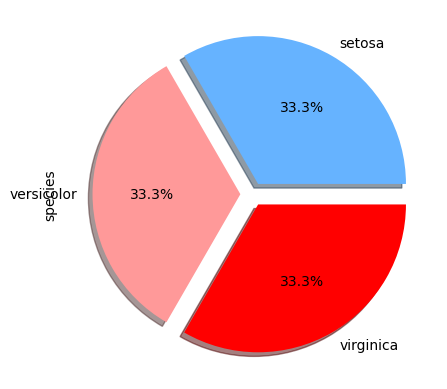

In [23]:
#Pie plot to show the overall types of Iris classifications
colors = ['#66b3ff','#ff9999','red']
data['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

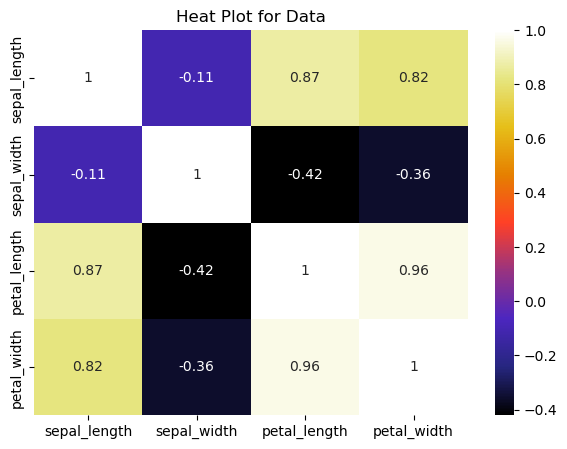

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [28]:
#Defining independent and dependent variables
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = data.loc[:, features].values   #defining the feature matrix
y = data.species

In [29]:
#Splitting the dataset into training and test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'petal length(cm) <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal length(cm) <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = virginica'),
 Text(0.2, 0.5, 'petal width(cm) <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal width(cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal length(cm) <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica'),
 Text(0.7, 0.3, 'petal width(cm) <= 1.8\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 

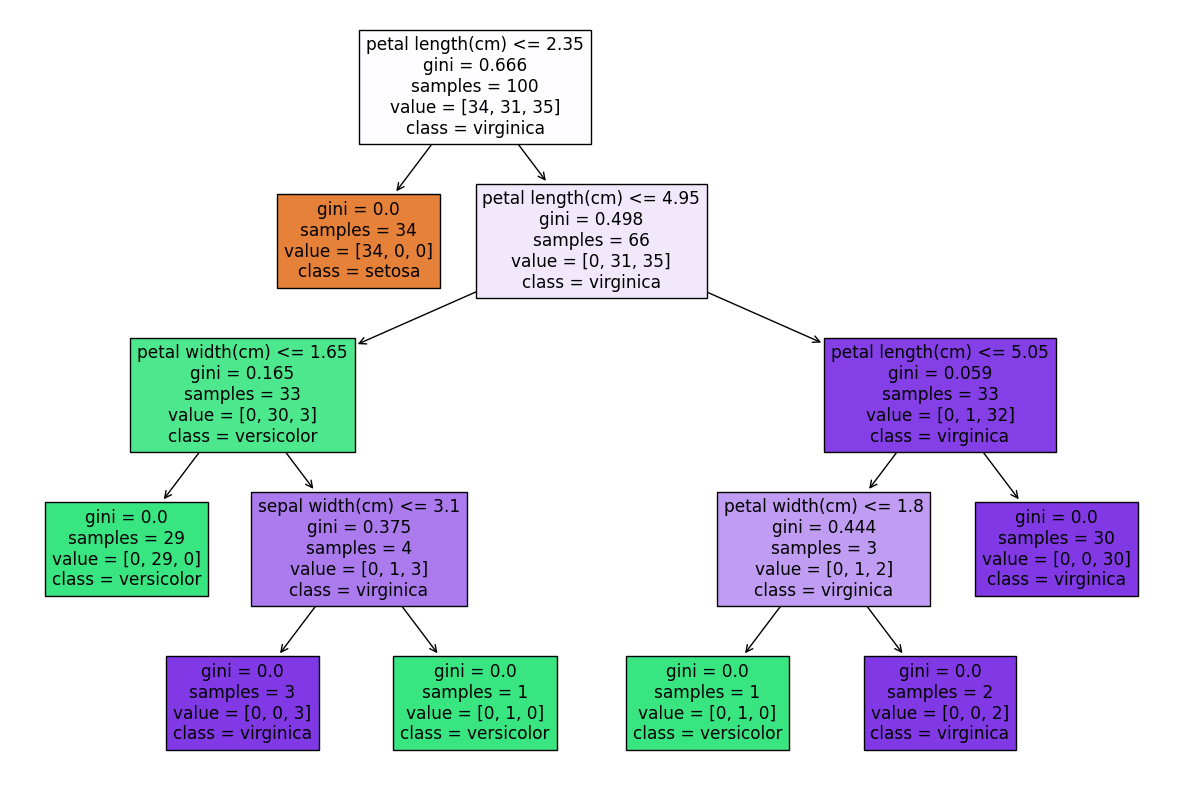

In [32]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= data.species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

In [33]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica'], dtype=object)

In [34]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

Decision Tree Classifier
Accuracy: 96.0%


D:\anacon\envs\tenserflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


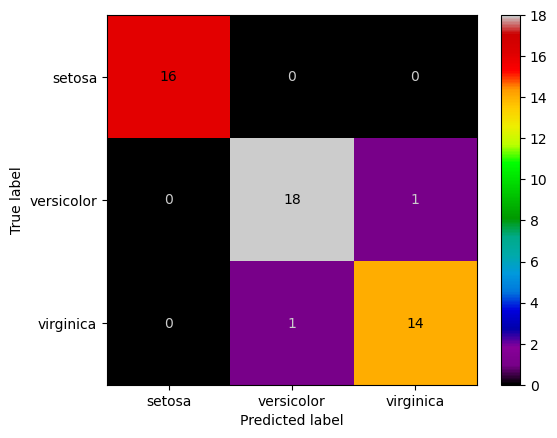

In [36]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)
    print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score*100,2)}%')

In [37]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [38]:
dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['setosa'], dtype=object)

In [39]:
dtree.predict([[9, 3.1, 5, 1.5]])

array(['versicolor'], dtype=object)

In [40]:

dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['virginica'], dtype=object)